In [1]:
from IPython.display import display, HTML

# Display the car gif centered
display(HTML("""
    <div style="text-align: center;">
        <img src="https://media.giphy.com/media/3o6ZsXzHbzYBRYY3Vq/giphy.gif" style="width: 1000px; height: auto;" />
    </div>
"""))



### Data Features
 My Dataset Comprises of 10 columns

<b>. Make:</b> The car brand (e.g., Toyota, Lexus).

<b>. Year of manufacture:</b> Likely a crucial predictor for car value, though it has missing values.

<b>. Condition:</b> Indicates whether the car is used or new.

<b>. Mileage:</b> The distance the car has traveled, potentially influential in price prediction.

<b>. Engine Size:</b> Indicates the engine capacity, which might affect the price.

<b>. Fuel:</b> The type of fuel used by the car (e.g., Petrol).

<b>. Transmission:</b> Transmission type (e.g., Automatic).

<b>. Price:</b> The target variable for prediction.

<b>. Build:</b> It seems sparsely populated and might not add much value to predictions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\user\OneDrive - Strathmore University\Projects\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\user\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\user\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "c:\Users\user\anaconda3\Lib

AttributeError: _ARRAY_API not found

### Load the Dataset

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv("Nigerian_Car_Prices.csv")

# Display the first few rows to confirm it's loaded correctly
df.head()

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,"3,120,000",NaN
1,1,Lexus,NaN,NaN,138024.0,NaN,NaN,Automatic,"5,834,000",NaN
2,2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,"3,640,000",NaN
3,3,Lexus,NaN,NaN,213362.0,NaN,NaN,Automatic,"3,594,000",NaN
4,4,Mercedes-Benz,NaN,NaN,106199.0,NaN,NaN,Automatic,"8,410,000",NaN


In [4]:
df.shape

(4095, 10)

In [5]:
df.columns

Index(['Unnamed: 0', 'Make', 'Year of manufacture', 'Condition', 'Mileage',
       'Engine Size', 'Fuel', 'Transmission', 'Price', 'Build'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0                0
Make                      0
Year of manufacture     478
Condition               479
Mileage                  71
Engine Size             511
Fuel                    488
Transmission             20
Price                     0
Build                  2968
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4095 non-null   int64  
 1   Make                 4095 non-null   object 
 2   Year of manufacture  3617 non-null   float64
 3   Condition            3616 non-null   object 
 4   Mileage              4024 non-null   float64
 5   Engine Size          3584 non-null   float64
 6   Fuel                 3607 non-null   object 
 7   Transmission         4075 non-null   object 
 8   Price                4095 non-null   object 
 9   Build                1127 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 320.1+ KB


## <b>Data Cleaning</b>

##### Clean and Convert the Price column to Float

In [8]:
# Remove commas from the Price column and convert to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [9]:
df.dtypes

Unnamed: 0               int64
Make                    object
Year of manufacture    float64
Condition               object
Mileage                float64
Engine Size            float64
Fuel                    object
Transmission            object
Price                  float64
Build                   object
dtype: object

#### Remove the Unnamed: 0 Column since it has no impact

In [10]:
# Drop the 'Unnamed' column
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [11]:
# Verify that the column has been dropped
print(df.head().to_string())

            Make  Year of manufacture      Condition   Mileage  Engine Size    Fuel Transmission      Price Build
0         Toyota               2007.0  Nigerian Used  166418.0       2400.0  Petrol    Automatic  3120000.0   NaN
1          Lexus                  NaN            NaN  138024.0          NaN     NaN    Automatic  5834000.0   NaN
2  Mercedes-Benz               2008.0  Nigerian Used  376807.0       3000.0  Petrol    Automatic  3640000.0   NaN
3          Lexus                  NaN            NaN  213362.0          NaN     NaN    Automatic  3594000.0   NaN
4  Mercedes-Benz                  NaN            NaN  106199.0          NaN     NaN    Automatic  8410000.0   NaN


In [12]:
df["Year of manufacture"].value_counts()


Year of manufacture
2007.0    436
2008.0    364
2006.0    279
2009.0    277
2010.0    277
2004.0    246
2005.0    236
2011.0    215
2003.0    184
2013.0    182
2012.0    181
2014.0    144
2002.0    132
2015.0     93
2001.0     85
2000.0     56
2016.0     53
1999.0     43
2017.0     39
2018.0     26
1998.0     19
1997.0     13
2020.0     12
2019.0     10
1995.0      5
1996.0      4
2021.0      3
1992.0      2
1994.0      1
Name: count, dtype: int64

In [13]:
df["Year of manufacture"].mean()


np.float64(2007.898534697263)

In [14]:
df["Year of manufacture"].median()

2008.0

In [15]:
# Use style.format to apply display formatting
df.describe().style.format({
    'Year of manufacture': '{:.0f}',
    'Mileage': '{:.0f}',
    'Engine Size': '{:.0f}',
    'Price': '{:.0f}'
})


,Year of manufacture,Mileage,Engine Size,Price
count,3617,4024,3584,4095
mean,2008,182534,3275,4271288
std,4,210923,7693,4900064
min,1992,1,3,458000
25%,2005,102064,2000,1872000
50%,2008,161352,2500,2940000
75%,2011,231952,3500,4725000
max,2021,9976050,371000,58800000


In [16]:
df.describe(include="object")

,Make,Condition,Fuel,Transmission,Build
count,4095,3616,3607,4075,1127
unique,49,3,4,4,1
top,Toyota,Nigerian Used,Petrol,Automatic,SUV
freq,1469,2521,3535,3810,1127


In [17]:
# Calculate the percentage of null values per column
null_percentages = df.isnull().mean() * 100

# Display the result
print(null_percentages)


Make                    0.000000
Year of manufacture    11.672772
Condition              11.697192
Mileage                 1.733822
Engine Size            12.478632
Fuel                   11.916972
Transmission            0.488400
Price                   0.000000
Build                  72.478632
dtype: float64


In [18]:
df["Build"].value_counts()

Build
SUV    1127
Name: count, dtype: int64

In [19]:
# Impute 'Year of manufacture' and 'Engine Size' with the mean
df['Year of manufacture'] = df['Year of manufacture'].fillna(df['Year of manufacture'].mean())
df['Engine Size'] = df['Engine Size'].fillna(df['Engine Size'].mean())

In [20]:
# Impute 'Condition', 'Fuel', 'Transmission', and 'Build' with the mode (most frequent value)
df['Condition'] = df['Condition'].fillna(df['Condition'].mode()[0])
df['Fuel'] = df['Fuel'].fillna(df['Fuel'].mode()[0])
df['Transmission'] = df['Transmission'].fillna(df['Transmission'].mode()[0])
df['Build'] = df['Build'].fillna(df['Build'].mode()[0])

In [21]:
# Impute 'Mileage' with the median
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())

In [22]:
df.isnull().sum()

Make                   0
Year of manufacture    0
Condition              0
Mileage                0
Engine Size            0
Fuel                   0
Transmission           0
Price                  0
Build                  0
dtype: int64

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,4095,49,Toyota,1469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year of manufacture,4095.0,NaN,NaN,NaN,2007.898535,4.041304,1992.0,2005.0,2007.898535,2010.0,2021.0
Condition,4095,3,Nigerian Used,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,4095.0,NaN,NaN,NaN,182166.412088,209104.621043,1.0,102598.5,161352.5,230637.0,9976050.0
Engine Size,4095.0,NaN,NaN,NaN,3274.976562,7197.353858,3.0,2400.0,3000.0,3500.0,371000.0
Fuel,4095,4,Petrol,4023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,4095,4,Automatic,3830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4095.0,NaN,NaN,NaN,4271287.728694,4900063.741435,458000.0,1872000.0,2940000.0,4725000.0,58800000.0
Build,4095,1,SUV,4095,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Outliers detection

In [24]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 and Q3 for each numerical column
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Display the results
print("Q1:\n", Q1)
print("Q3:\n", Q3)
print("IQR:\n", IQR)


Q1:
 Year of manufacture       2005.0
Mileage                 102598.5
Engine Size               2400.0
Price                  1872000.0
Name: 0.25, dtype: float64
Q3:
 Year of manufacture       2010.0
Mileage                 230637.0
Engine Size               3500.0
Price                  4725000.0
Name: 0.75, dtype: float64
IQR:
 Year of manufacture          5.0
Mileage                 128038.5
Engine Size               1100.0
Price                  2853000.0
dtype: float64


### Observations

i. <b> Price </b> has got a higher outlier range as the outlier is almost equivalent to the median price according to the statistical description.

ii. <b> Mileage and Engine size </b> also have outliers


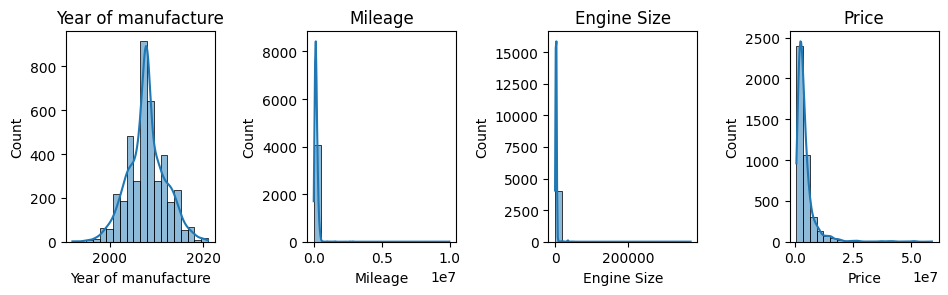

In [25]:
# Distribution of Numerical Features
numerical_features = ['Year of manufacture', 'Mileage',
                      'Engine Size', 'Price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

#### Observations

1. <b>Positive Skewness:</b> For Mileage, Engine Size, and Price, the positive skew suggests that these features have a long tail on the right. In practical terms, most of the cars in the dataset are clustered around lower values, with just a few cars at the higher end

2. <b>Near-Zero Skewness:</b> The Year of manufacture column has a value close to zero, indicating that it is roughly symmetric, with a balanced distribution across the years in the dataset.

C:\Users\user\AppData\Local\Temp\ipykernel_30920\3784662336.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_to_plot, palette='bright', ax=axes[i], saturation=0.95, width=0.6)  # Adjust width for spacing
C:\Users\user\AppData\Local\Temp\ipykernel_30920\3784662336.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_to_plot, palette='bright', ax=axes[i], saturation=0.95, width=0.6)  # Adjust width for spacing
C:\Users\user\AppData\Local\Temp\ipykernel_30920\3784662336.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

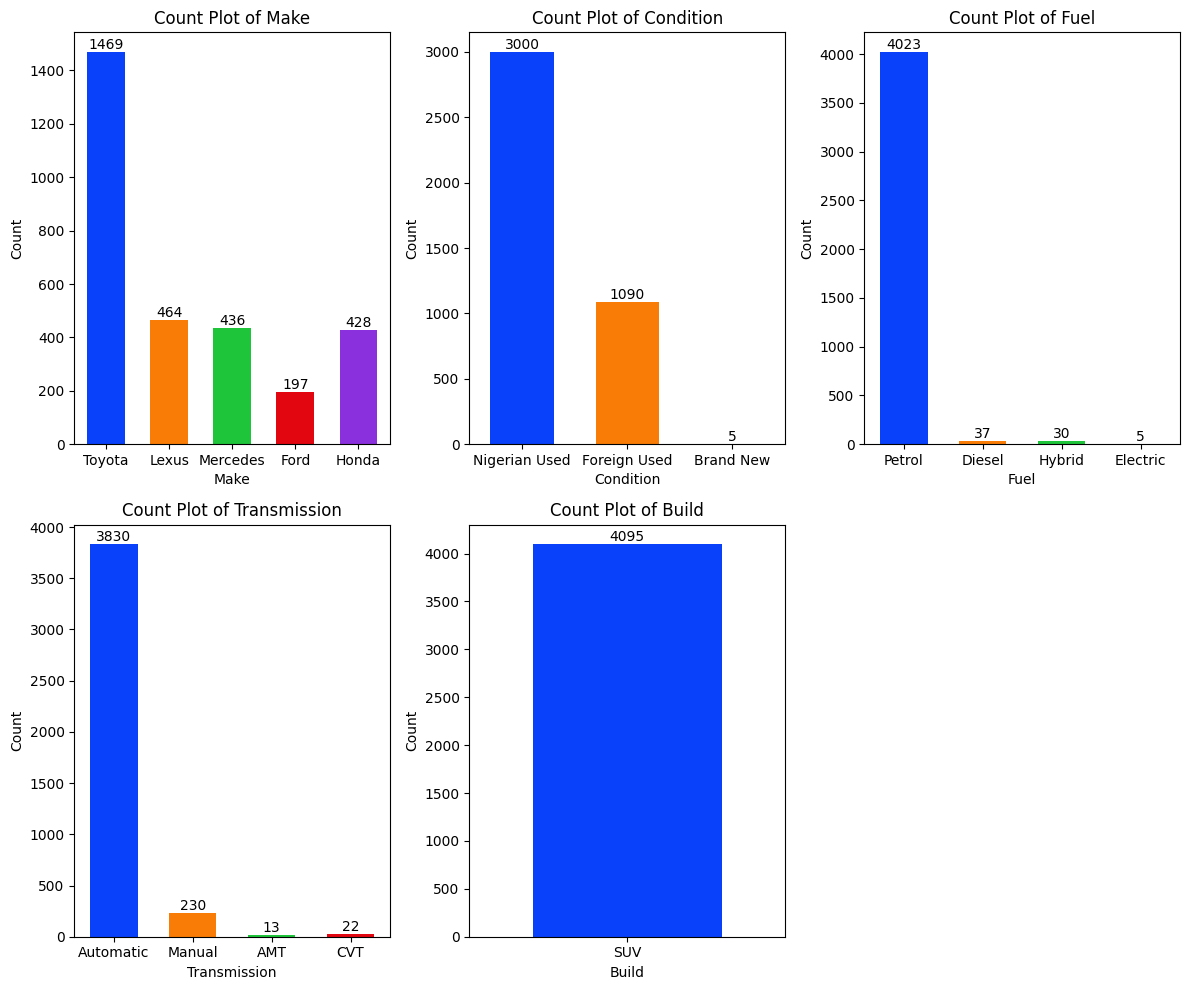

In [26]:
# Define the list of categorical columns to analyze
categorical_columns = ['Make', 'Condition', 'Fuel', 'Transmission', 'Build']

# Create a mapping for shortened names in the "Make" column
make_replacements = {
    'Mercedes-Benz': 'Mercedes',
    'Land Rover': 'LandRover',
    'Chevrolet': 'Chevy',  # Example, add more replacements if needed
    # Add more replacements as needed
}

# Replace long names in the 'Make' column with shorter names
df['Make'] = df['Make'].replace(make_replacements)

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.ravel()  # Flatten the 2D array of axes

# Filter top 5 most frequent makes for 'Make' column
top_makes = df['Make'].value_counts().nlargest(5).index
filtered_df = df[df['Make'].isin(top_makes)]

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    # Use filtered data for 'Make' column to avoid overlap
    data_to_plot = filtered_df if column == 'Make' else df
    sns.countplot(x=column, data=data_to_plot, palette='bright', ax=axes[i], saturation=0.95, width=0.6)  # Adjust width for spacing

    # Add labels to each bar
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10, label_type="edge", rotation=0)

    # Set titles and labels
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Remove the last (6th) subplot to keep only 5
fig.delaxes(axes[-1])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


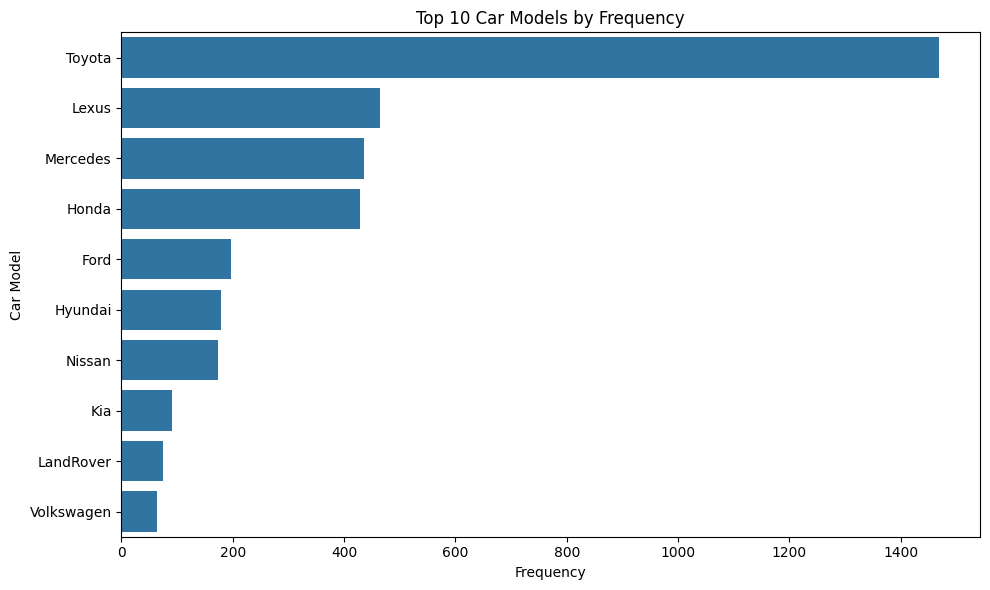

In [27]:
n = 10  # Number of top car models to plot
top_car_models = df['Make'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

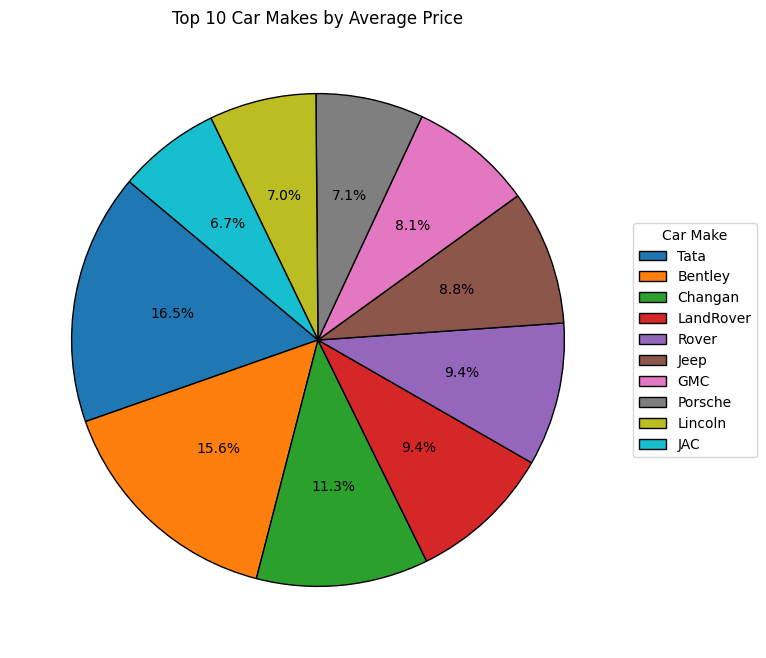

In [28]:
# Calculate the average price for each car make and sort them
avg_prices_by_car = df.groupby('Make')['Price'].mean().sort_values(ascending=False)

# Select the top 10 car makes by average price
n = 10
top_car_makes = avg_prices_by_car.head(n)
make_labels = top_car_makes.index  # Get the names of the top car makes
make_avg_prices = top_car_makes.values  # Get the average prices of the top car makes

# Define a color palette with distinct colors for each Make
colors = plt.cm.tab10.colors[:n]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    make_avg_prices,
    labels=[''] * n,   # Hide the labels on the pie chart
    autopct='%1.1f%%',  # Show percentage on each slice
    startangle=140,     # Rotate the start angle for better readability
    colors=colors,      # Apply the color palette
    wedgeprops={'edgecolor': 'black'}  # Add edge color for better definition
)

# Add a legend with color-coded car makes
plt.legend(make_labels, title="Car Make", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the plot
plt.title(f'Top {n} Car Makes by Average Price')
plt.show()


In [29]:
# 1. Define a function to identify and handle outliers based on IQR
def handle_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

# 2. Identify and handle outliers for 'Price', 'Mileage', and 'Year of manufacture'
outlier_columns = ['Price', 'Mileage', 'Engine Size', 'Year of manufacture']

for col in outlier_columns:
    lower, upper = handle_outliers(df, col)

    # Option 1: Remove outliers
    df = df[(df[col] >= lower) & (df[col] <= upper)]

    # Option 2: Cap outliers (uncomment this block if you want to cap instead of remove)
    # df[col] = df[col].clip(lower=lower, upper=upper)

# Check the number of rows after handling outliers
print(f"DataFrame shape after handling outliers: {df.shape}")


DataFrame shape after handling outliers: (3478, 9)


In [30]:
df1 = df.copy()

In [ ]:
# Select only the numerical columns
numerical_df1 = df1.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df1.corr()

# Display the correlation matrix
print(correlation_matrix)


                     Year of manufacture   Mileage  Engine Size     Price
Year of manufacture             1.000000 -0.331587    -0.059484  0.538335
Mileage                        -0.331587  1.000000    -0.003963 -0.290019
Engine Size                    -0.059484 -0.003963     1.000000  0.295498
Price                           0.538335 -0.290019     0.295498  1.000000


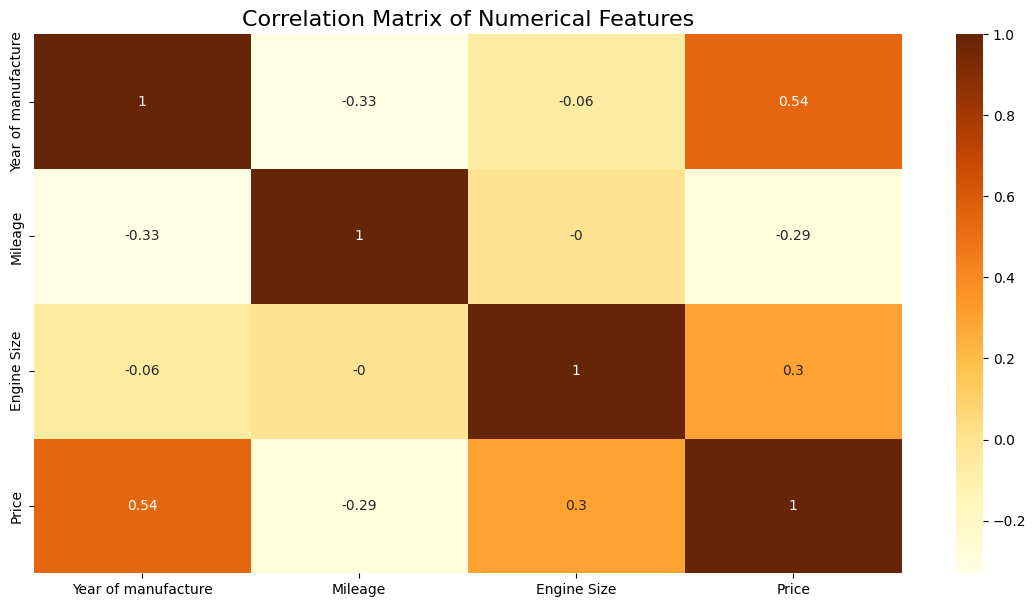

In [32]:
# Set the figure size
plt.figure(figsize=(14, 7))

# Plot heatmap for correlation matrix of numerical features
sns.heatmap(df.select_dtypes('number').corr().round(2), annot=True, cmap='YlOrBr')

# Title of the plot
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

### Observations
<b> i. Year of Manufacture vs Price</b>

There is a moderate positive correlation between the Year of Manufacture and Price.This suggests that newer cars tend to have a higher price. The older the car, the lower the likely price, but this relationship is not perfectly linea

<b> ii. Mileage vs. Engine Size</b>

There is virtually no correlation between Mileage and Engine Size.
This suggests that the size of the engine has little to no impact on the number of miles driven.

In [33]:
from sklearn.preprocessing import LabelEncoder

# List of columns for Label Encoding
label_encode_columns = ['Make', 'Condition', 'Build']
# List of columns for One-Hot Encoding
one_hot_encode_columns = ['Fuel', 'Transmission']

# Initialize LabelEncoders for Label Encoding
label_encoders = {}
for col in label_encode_columns:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le  # Store encoders for potential inverse mapping

# Apply One-Hot Encoding
df1 = pd.get_dummies(df1, columns=one_hot_encode_columns, prefix=one_hot_encode_columns)

# Display updated dataframe structure
df1.head()


,Make,Year of manufacture,Condition,Mileage,Engine Size,Price,Build,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Petrol,Transmission_AMT,Transmission_Automatic,Transmission_CVT,Transmission_Manual
0,40,2007.000000,2,166418.0,2400.000000,3120000.0,0,False,False,False,True,False,True,False,False
1,22,2007.898535,2,138024.0,3274.976562,5834000.0,0,False,False,False,True,False,True,False,False
2,26,2008.000000,2,376807.0,3000.000000,3640000.0,0,False,False,False,True,False,True,False,False
3,22,2007.898535,2,213362.0,3274.976562,3594000.0,0,False,False,False,True,False,True,False,False
4,26,2007.898535,2,106199.0,3274.976562,8410000.0,0,False,False,False,True,False,True,False,False


In [34]:
# Define target (y) and features (X) properly
X = df1.drop(columns=['Price'])  # Use 'drop' with 'columns' argument
y = df1['Price']  # Target variable

# Ensure all categorical variables in X are encoded
remaining_categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=remaining_categorical_columns, drop_first=True)


In [35]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm definitions
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")

Features (X): (3478, 14)
Target (y): (3478,)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}
model_performance = {}

# Initialize variables to store the best model and its metrics
best_model = None
best_metrics = {"MAE": float('inf'), "RMSE": float('inf')}

for model_name, model in models.items():
    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    model_performance[model_name] = {"MAE": mae, "RMSE": rmse}

    # Update best model based on RMSE and MAE
    if rmse < best_metrics["RMSE"] and mae < best_metrics["MAE"]:
        best_model = model_name
        best_metrics = {"MAE": mae, "RMSE": rmse}

# Print model performance and the best model
print("Model Performance:", model_performance)
print(f"\nBest Model: {best_model} with MAE: {best_metrics['MAE']:.2f} and RMSE: {best_metrics['RMSE']:.2f}")


Model Performance: {'Linear Regression': {'MAE': np.float64(935343.8164362512), 'RMSE': np.float64(1266335.1038610898)}, 'Decision Tree': {'MAE': np.float64(661183.9128352491), 'RMSE': np.float64(1199853.8916231915)}, 'Random Forest': {'MAE': np.float64(645806.037827267), 'RMSE': np.float64(1014333.2781932403)}}

Best Model: Random Forest with MAE: 645806.04 and RMSE: 1014333.28


Model Performance: {'Linear Regression': {'MAE': np.float64(935343.8164362512), 'RMSE': np.float64(1266335.1038610898)}, 'Decision Tree': {'MAE': np.float64(661183.9128352491), 'RMSE': np.float64(1199853.8916231915)}, 'Random Forest': {'MAE': np.float64(645806.037827267), 'RMSE': np.float64(1014333.2781932403)}}

Best Model: Random Forest with MAE: 645806.04 and RMSE: 1014333.28


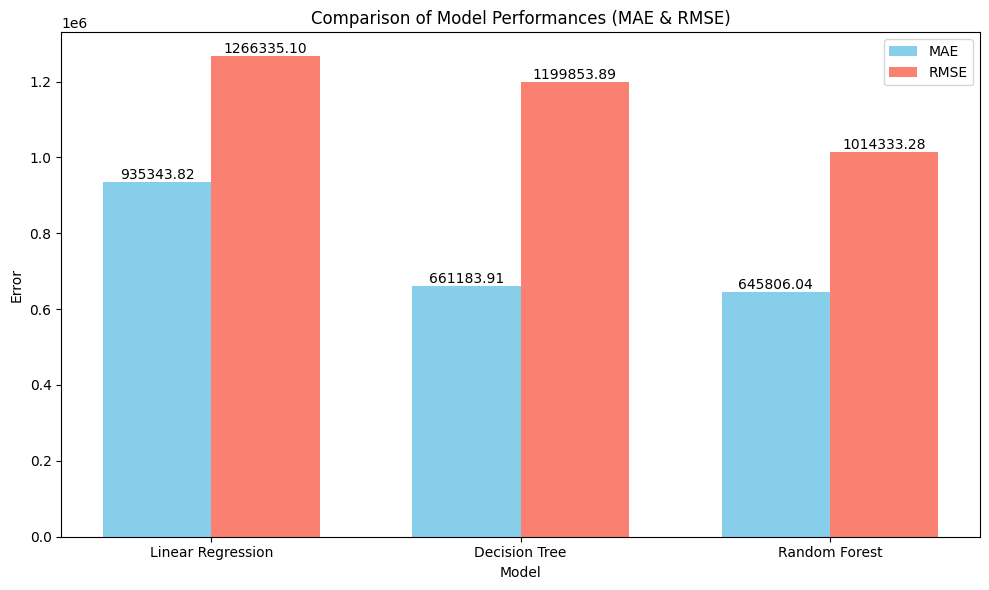

In [37]:


# Initialize and train models (same code as before)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}
model_performance = {}

# Initialize variables to store the best model and its metrics
best_model = None
best_metrics = {"MAE": float('inf'), "RMSE": float('inf')}

# Train models and store their performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    model_performance[model_name] = {"MAE": mae, "RMSE": rmse}

    # Update best model based on RMSE and MAE
    if rmse < best_metrics["RMSE"] and mae < best_metrics["MAE"]:
        best_model = model_name
        best_metrics = {"MAE": mae, "RMSE": rmse}

# Print model performance and the best model
print("Model Performance:", model_performance)
print(f"\nBest Model: {best_model} with MAE: {best_metrics['MAE']:.2f} and RMSE: {best_metrics['RMSE']:.2f}")

# Plotting the model performance
model_names = list(model_performance.keys())
mae_values = [model_performance[model]["MAE"] for model in model_names]
rmse_values = [model_performance[model]["RMSE"] for model in model_names]

# Set up a bar plot with two sets of bars for each model
x = np.arange(len(model_names))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for MAE and RMSE
bars1 = ax.bar(x - width / 2, mae_values, width, label='MAE', color='skyblue')
bars2 = ax.bar(x + width / 2, rmse_values, width, label='RMSE', color='salmon')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('Comparison of Model Performances (MAE & RMSE)')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Add labels to the bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{yval:.2f}',
                ha='center', va='bottom', color='black')

add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()


### Fine Tuning our Model

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the best model
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Evaluating the Fine Tuned Model for Improvement

In [39]:
# Predict using the tuned model
y_pred = best_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 644161.0270170817
RMSE: 1011893.6396271953


In [40]:
best_model = grid_search.best_estimator_



In [41]:
print(type(best_model))  # Should return <class 'sklearn.ensemble._forest.RandomForestRegressor'>


<class 'sklearn.ensemble._forest.RandomForestRegressor'>


### Feature Importance Analysis

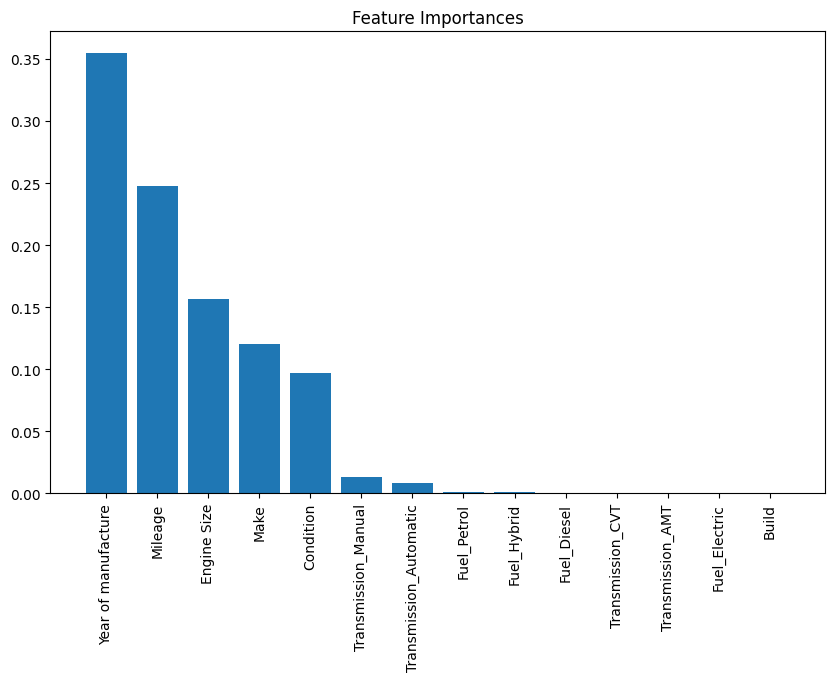

In [42]:
# Ensure all features are numeric
importances = best_model.feature_importances_
feature_names = X.columns

# Sort and visualize
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.show()


### Now let me save my Model for Deployment

In [43]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'best_random_forest_model.pkl')

# To load the model later, use:
loaded_model = joblib.load('best_random_forest_model.pkl')
